Implement autoencoder on MNIST dataset
1. Vanilla Autoencoder
2. Multilayer AE
3. Denoise AE
4. Conv AE

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
print('imported')

imported


In [ ]:
# load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# reshape X_train & X_test and normalize
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float')/255.
X_test = X_test.astype('float')/255.

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

Vanilla Autoencoder

In [ ]:
# parameters
input_size = 784
hidden_size = 64
output_size = 784

Neural Network
*   Sequential API
*   Functional API


In [ ]:
# functional keras API
from tensorflow.keras.layers import Input

In [ ]:
x = Input(shape=(input_size))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

model_ae = Model(inputs=x, outputs=r)

In [ ]:
model_ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_ae.compile(optimizer='adam', loss='mse')

input is the output. So, X_train is passed twice during fit

In [ ]:
epochs = 5
batch_size = 128

history = model_ae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.0438 - val_loss: 0.0218
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0170 - val_loss: 0.0127
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0108 - val_loss: 0.0087
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0054


In [ ]:
model_ae.evaluate(X_test, X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0054


0.005442970898002386

In [ ]:
decoded_images = model_ae.predict(X_test)

313/313 [==============================] - 1s 3ms/step


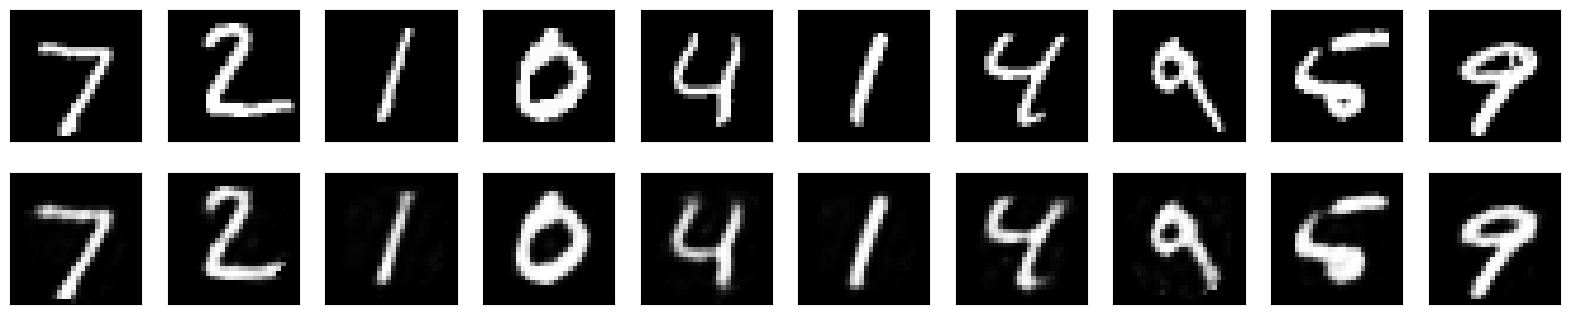

In [ ]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
  # display the original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i+n+1)
  plt.imshow(decoded_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# print encoded / compressed images
encoder = Model(x, h)
encoded_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


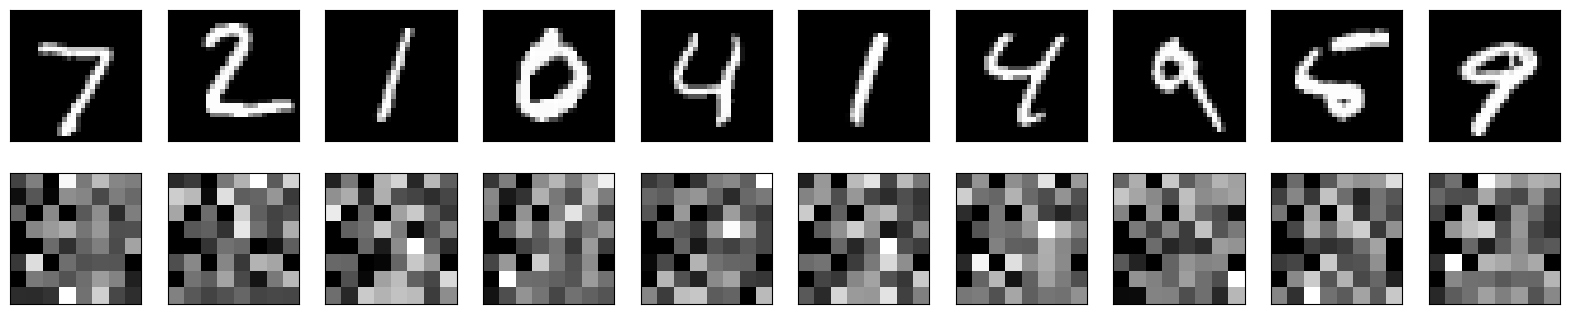

In [ ]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
  # display the original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded images
  ax = plt.subplot(3, n, i+n+1)
  plt.imshow(encoded_images[i].reshape(8, 8))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Multilayer Autoencoder

*   784 -> 128 -> 64 -> 128 -> 784


In [ ]:
# parameters
input_size = 784
hidden_size = 128
code_size = 64
output_size = 784

In [ ]:
# encoder
x = Input(shape=(input_size))
hidden_1 = Dense(hidden_size, activation='relu')(x)

h = Dense(code_size, activation='relu')(hidden_1)

# decoder
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(output_size, activation='sigmoid')(hidden_2)

autoencoder1 = Model(inputs=x, outputs=r)

In [ ]:
autoencoder1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
autoencoder1.compile(optimizer='adam', loss='mse')

In [ ]:
epochs = 5
batch_size = 128

history = autoencoder1.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0411 - val_loss: 0.0194
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0159 - val_loss: 0.0129
Epoch 3/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0120 - val_loss: 0.0106
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0090 - val_loss: 0.0082


In [ ]:
autoencoder1.evaluate(X_test, X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0082


0.008218237198889256

In [ ]:
decoded_images = autoencoder1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


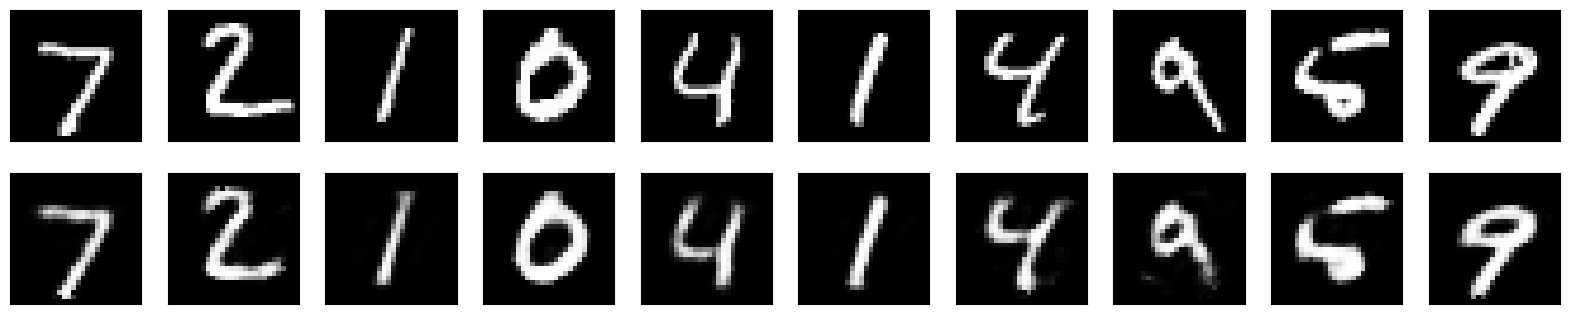

In [ ]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
  # display the original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i+n+1)
  plt.imshow(decoded_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Denoise Autoencoder

In [50]:
# create noisy input
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [51]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [52]:
# create the model
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 500)               392500    
                                                                 
 dense_20 (Dense)            (None, 300)               150300    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 300)               30300     
                                                                 
 dense_23 (Dense)            (None, 500)               150500    
                                                                 
 dense_24 (Dense)            (None, 784)               392784    
                                                                 
Total params: 1146484 (4.37 MB)
Trainable params: 114648

In [54]:
model.compile(optimizer='adam', loss='mse')

In [55]:
epochs = 5
batch_size = 128

history = model.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_noisy, X_test))

Epoch 1/5
469/469 [==============================] - 15s 30ms/step - loss: 0.0339 - val_loss: 0.0162
Epoch 2/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0139 - val_loss: 0.0116
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 4/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 5/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0084 - val_loss: 0.0082


In [56]:
# predict the test images
decoded_images = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


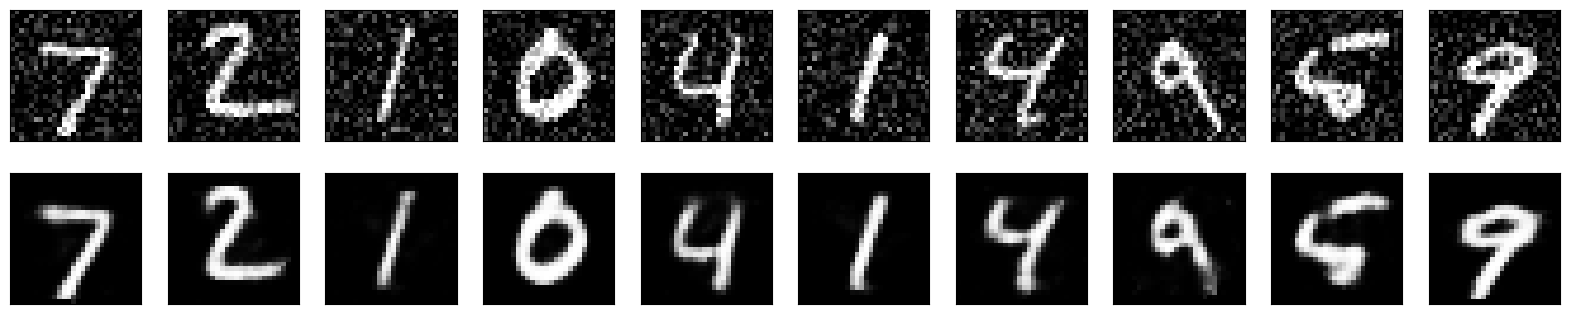

In [58]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
  # display the original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i+n+1)
  plt.imshow(decoded_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()